<h1 align='center'> Beginner Netflix Data Analysis <h1>




# Data used:
Netflix is one of the most popular media and video streaming platforms. They have over 9000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# Analysis:
A simple analysis for those who start with data analysis in python.
Different types of charts are made using a few variables and columns.

**Loading the dataset:**

**Data Cleaning:** 
 
**Data Visualization:** 

**Data Visualization:** 




#####  Importing Libraries

In [299]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



##### Loading the dataset

In [344]:
df = pd.read_excel('Netflix.xls')
df.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


##### Check for NULL Values

In [302]:
df.isnull().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64

In [ ]:
import missingno as msno

msno.matrix(df)
plt.show()

##### Show the top 20 most frequent languages.


In [304]:

pd.set_option("display.max_rows", None)
df["Languages"].value_counts().head(20)


English              3754
Japanese              801
Korean                408
English, Spanish      238
Spanish               188
Hindi                 185
English, French       143
French                120
Japanese, English     116
Mandarin               96
German                 96
Thai                   65
Portuguese             63
English, Japanese      58
Dutch                  55
English, German        52
English, Russian       49
French, English        49
Cantonese              48
English, Italian       46
Name: Languages, dtype: int64

##### This code is cleaning the "Languages" column by removing all the rows where the value is null, and also removing the language "English" from the field when there are multiple languages in the same field.

In [305]:
df = df[df["Languages"].notnull()]
df.loc[df["Languages"].str.count(" ") > 0, "Languages"] = df["Languages"].str.replace("English", "")

##### Replace all commas (,) in the "Languages" column 

In [308]:
df['Languages'] = df['Languages'].str.replace(',','')
df['Languages'].value_counts().head(50)

English               3754
Japanese               801
Korean                 408
 Spanish               238
Spanish                188
Hindi                  185
 French                143
French                 120
Japanese               116
Mandarin                96
German                  96
Thai                    65
Portuguese              63
 Japanese               58
Dutch                   55
 German                 52
 Russian                49
French                  49
Cantonese               48
 Italian                46
Italian                 42
Czech                   41
Arabic                  41
Hindi                   39
Turkish                 39
Romanian                38
Polish                  36
Indonesian              36
Tamil                   34
Swedish                 31
 Mandarin               30
Filipino Tagalog        29
 Arabic                 29
Chinese                 28
Spanish                 26
Danish                  26
 Hebrew                 24
 

##### Remove leading and trailing whitespaces from the "Languages" column

In [309]:
df["Languages"] = df["Languages"].str.strip()


##### Creates a bar chart to display the top 10 most frequent languages

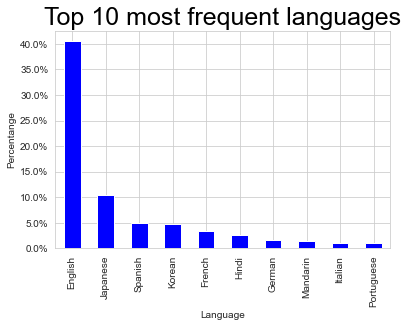

<Figure size 72x360 with 0 Axes>

In [310]:
fig=plt.figure()

top_languages = df["Languages"].value_counts(normalize=True).head(10)

top_languages.plot(kind='bar', color="Blue")

import matplotlib.ticker as ticker

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.title('Top 10 most frequent languages', color='black', fontsize=25)
plt.xlabel('Language')
plt.ylabel('Percentange')
plt.figure(figsize=(1,5))
fig.set_facecolor("white")

plt.show()


##### Identify languages that tend to have higher IMDb scores.

     Languages  IMDb Score
9       Korean    7.337783
8     Japanese    7.318789
0       Arabic    7.175000
14        Thai    7.157500
11  Portuguese    7.125000
2        Dutch    7.109091
6        Hindi    7.064530
5       German    7.044304
10    Mandarin    7.028148
4       French    7.000000


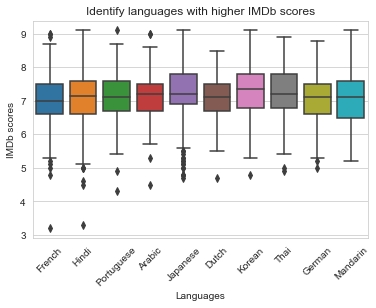

In [311]:

#It creat a table
filtered_table = df[df.groupby('Languages').Languages.transform('size') > 50]
table = filtered_table.groupby("Languages")["IMDb Score"].mean().reset_index()
top_10_languages = table.nlargest(10, 'IMDb Score')
table = table.sort_values('IMDb Score')

print(top_10_languages)

#It creates a boxplot
fig=plt.figure()
filtered_table = filtered_table.sort_values('IMDb Score')


sns.boxplot(x='Languages', y='IMDb Score', data=filtered_table[filtered_table['Languages'].isin(top_10_languages['Languages'])])
plt.title("Identify languages with higher IMDb scores")
plt.xlabel("Languages")
plt.ylabel("IMDb scores")
plt.xticks(rotation=45)
fig.set_facecolor("white")


##### Creates a pie chart to display the proportion of "Series or Movie"

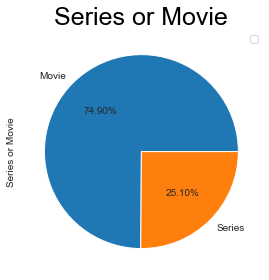

In [312]:
fig=plt.figure()
df["Series or Movie"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title ("Series or Movie", color='black', fontsize=25)
plt.tight_layout() 
fig.set_facecolor("white")
plt.legend(labels=[])
plt.show()


##### Get a general idea of the distribution of the IMDb scores in the dataset

In [313]:
Datos_IMDB = df["IMDb Score"].describe()
Datos_IMDB

count    9262.000000
mean        6.949784
std         0.901645
min         1.600000
25%         6.500000
50%         7.000000
75%         7.500000
max         9.700000
Name: IMDb Score, dtype: float64

##### It is separated into too many subgenres

In [316]:
print("Number of subgenres")
print(df['Genre'].nunique())
print("")
print(df['Genre'].value_counts().head(50))


Number of subgenres
1518

Drama                                            641
Comedy                                           577
Drama, Romance                                   327
Documentary                                      326
Comedy, Drama                                    301
Comedy, Drama, Romance                           279
Comedy, Romance                                  256
Crime, Drama, Thriller                           143
Action, Crime, Thriller                          137
Action, Crime, Drama, Thriller                   108
Crime, Drama                                     107
Crime, Drama, Mystery, Thriller                   98
Drama, Thriller                                   97
Horror, Mystery, Thriller                         76
Biography, Drama                                  70
Action, Thriller                                  67
Reality-TV                                        56
Action, Adventure, Sci-Fi                         56
Drama, Mystery, Thri

##### Split the 'Genre' column, and then extracting the first element

In [318]:
df['Genre_1'] = df['Genre'].str.split().str[0]
df['Genre_1'].value_counts().head(50)

Action,         1633
Comedy,         1488
Drama,          1181
Animation,      1084
Drama            641
Comedy           577
Crime,           537
Documentary,     437
Biography,       381
Documentary      326
Adventure,       292
Horror,          170
Short,            57
Reality-TV        56
Romance           46
Animation         40
Horror            33
Thriller          31
Mystery,          30
Fantasy,          28
Crime             24
Action            23
Game-Show,        21
Family,           18
Family            18
Music             10
Sci-Fi,            8
Biography          6
History            6
Music,             6
Musical,           5
Mystery            5
Romance,           5
Sci-Fi             4
Talk-Show          4
Adult,             3
Western            3
Fantasy            2
History,           2
Adult              2
Western,           2
Musical            2
News,              1
Short              1
Game-Show          1
War,               1
Adventure          1
Sport        

##### Remove the commas from the 'Genre' column

In [320]:
#Le quito las comas a quienes les quedó
df['Genre_1'] = df['Genre_1'].str.replace(',','')
df['Genre_1'].value_counts().head(50)

Comedy         2065
Drama          1822
Action         1656
Animation      1124
Documentary     763
Crime           561
Biography       387
Adventure       293
Horror          203
Short            58
Reality-TV       56
Romance          51
Family           36
Mystery          35
Thriller         31
Fantasy          30
Game-Show        22
Music            16
Sci-Fi           12
History           8
Musical           7
Adult             5
Western           5
Talk-Show         4
News              1
War               1
Sport             1
Name: Genre_1, dtype: int64

##### Remove the 8 rows with no values ​​in IMDB Score

In [321]:
df = df.dropna(subset=["IMDb Score"])


##### Average IMDb Score by Genre

<Figure size 432x288 with 0 Axes>

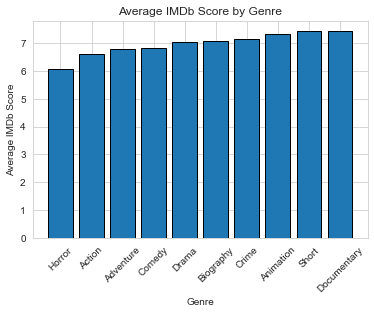

In [322]:
fig=plt.figure()

top_genres = df["Genre_1"].value_counts().head(10)

genres_data = df[df["Genre_1"].isin(top_genres.index)].groupby("Genre_1")["IMDb Score"].mean().sort_values()

fig, ax = plt.subplots()
ax.bar(genres_data.index, genres_data.values, edgecolor='black')
ax.set_title('Average IMDb Score by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Average IMDb Score')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()



##### Average IMDb Score by Genre (Boxplot)

<Figure size 432x288 with 0 Axes>

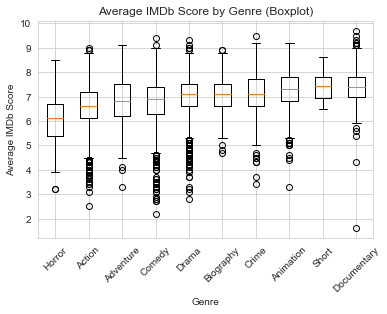

In [323]:
# Create a new figure
fig=plt.figure()

# Get the top 10 most common genres
top_genres = df["Genre_1"].value_counts().head(10)

# Group the dataframe by the 'Genre_1' column
genres_data = df[df["Genre_1"].isin(top_genres.index)].groupby("Genre_1")["IMDb Score"]

# Create a list of arrays with the IMDb scores for each genre
data = [df[df["Genre_1"]==genre]["IMDb Score"] for genre in mean_scores.index]

# Create the boxplot
fig, ax = plt.subplots()

# Sort the genres by mean IMDb Score
mean_scores = genres_data.mean()
mean_scores = mean_scores.sort_values()
ax.boxplot(data, labels=[mean_scores.index[i] for i in range(len(mean_scores))])

# Set the chart's title and axis labels
ax.set_title('Average IMDb Score by Genre (Boxplot)')
ax.set_xlabel('Genre')
ax.set_ylabel('Average IMDb Score')

# Set the background color to white
fig.set_facecolor("white")

# Rotate the x-ticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### The percentage of the top 10 most common genres

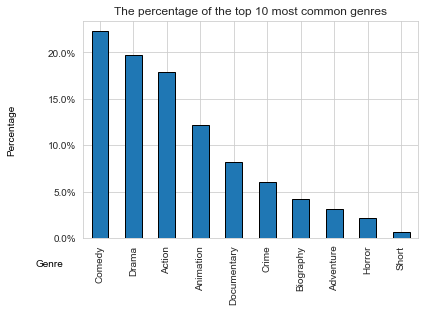

In [324]:
fig=plt.figure()
ax = plt.gca()
value_counts = df['Genre_1'].value_counts(normalize=True)
value_counts.head(10).plot(kind='bar', edgecolor='black')
ax.set_title('The percentage of the top 10 most common genres')
ax.set_ylabel('Percentage', color = "Black")
ax.set_xlabel('Genre', color = "Black")
ax.yaxis.set_label_coords(-0.2,0.5)
ax.xaxis.set_label_coords(-0.1,-0.1)

import matplotlib.ticker as ticker

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

fig.set_facecolor("white")

plt.show()



##### Series or Movie

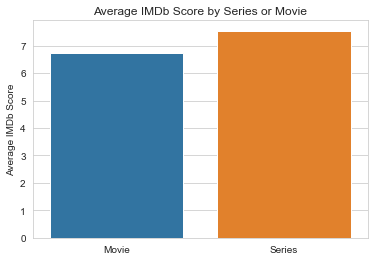

In [325]:
table = df.groupby("Series or Movie")["IMDb Score"].mean().reset_index()
sns.set_style("whitegrid")
sns.barplot(x="Series or Movie", y="IMDb Score", data=table)
plt.title("Average IMDb Score by Series or Movie")
plt.xlabel("")
plt.ylabel("Average IMDb Score")
plt.show()


##### Convert the "Netflix Release Date" column to datetime format

In [326]:
df["Netflix Release Date"] = pd.to_datetime(df["Netflix Release Date"], errors='coerce')
print(df["Netflix Release Date"].isna().sum())


0


##### The format is specified as 'Year-Month-Day'(

In [328]:
pd.to_datetime(df["Netflix Release Date"], format='%Y-%m-%d').head(50)

0    2021-03-04
1    2021-03-04
2    2021-03-03
3    2021-03-03
4    2021-03-03
5    2021-03-03
6    2021-03-03
7    2021-03-03
8    2021-03-03
9    2021-03-03
10   2021-03-03
11   2021-03-03
12   2021-03-03
13   2021-03-02
14   2021-03-02
15   2021-03-02
16   2021-03-01
17   2021-03-01
18   2021-03-01
19   2021-03-01
20   2021-03-01
21   2021-03-01
22   2021-03-01
23   2021-03-01
24   2021-03-01
25   2021-03-01
26   2021-03-01
27   2021-03-01
28   2021-03-01
29   2021-03-01
30   2021-03-01
31   2021-03-01
32   2021-03-01
33   2021-03-01
34   2021-03-01
35   2021-03-01
36   2021-03-01
37   2021-02-28
38   2021-02-28
39   2021-02-28
40   2021-02-28
41   2021-02-28
42   2021-02-28
43   2021-02-28
44   2021-02-28
45   2021-02-28
46   2021-02-28
47   2021-02-28
48   2021-02-28
49   2021-02-28
Name: Netflix Release Date, dtype: datetime64[ns]

##### Relationship between Genre and Duration in movies
###### WE CAN´T MAKE FOR SERIES BECAUSE ALL OF THEM ARE CATALOGED IN THE DATABASE AS IF THEY WERE LESS THAN 30 MINUTES DURATION

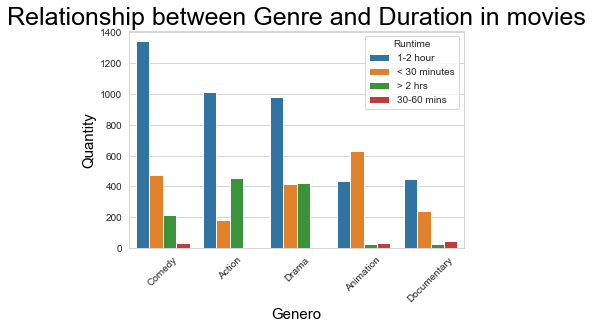

In [329]:
# Count the number of occurrences of each value in the 'Genre' column
genre_counts = df['Genre_1'].value_counts()

# Select the top 5 most common values
top_5_genres = genre_counts.nlargest(5).index

# Filter the dataframe to only include rows with the top 5 genres
filtered_df = df[df["Series or Movie"] == "Movie"]

filtered_df = df[df['Genre_1'].isin(top_5_genres)] 


# Group the dataframe by 'Genre' and 'Runtime' and count the number of occurrences
counts = filtered_df.groupby(['Genre_1', 'Runtime']).size().reset_index(name='Counts')
counts = counts.sort_values('Counts', ascending=False)

# Plot the bar chart with stacked bars
fig=plt.figure()
sns.barplot(x='Genre_1', y='Counts', hue='Runtime', data=counts)
plt.xlabel('Genero', color='black', fontsize=15)
plt.ylabel('Quantity', color='black', fontsize=15)
plt.title("Relationship between Genre and Duration in movies", color='black', fontsize=25)
plt.xticks(rotation=45)

fig.set_facecolor("white")




##### Series and movie releases

<Figure size 720x360 with 0 Axes>

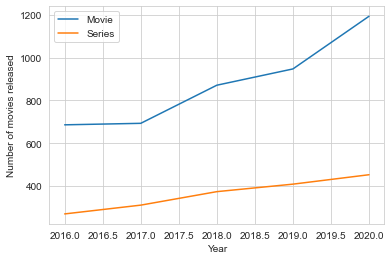

In [330]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

# Group the data by month and movie/series type
df_grouped = df.groupby([df["Netflix Release Date"].dt.year, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Netflix Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of movies released')
fig.set_facecolor("white")
plt.show()

##### Premieres of series and movies in each month. Table view

In [331]:
df["year"] = df["Netflix Release Date"].dt.year
df["month"] = df["Netflix Release Date"].dt.month

# Group the data by year, month and movie/series type
df_grouped = df.groupby([df["year"], df["month"], "Series or Movie"]).size().reset_index(name='counts')

# Pivot the table
df_pivot = df_grouped.pivot_table(index=['year', 'month'], columns='Series or Movie', values='counts', aggfunc='sum')

# Print the table
print(df_pivot)


Series or Movie  Movie  Series
year month                    
2016 1              73      15
     2              24       9
     3              51      11
     4              44      21
     5              43      13
     6              52      11
     7              45      28
     8              48      21
     9              69      27
     10             94      37
     11             75      33
     12             68      44
2017 1              47      16
     2              54      14
     3              80      39
     4              56      29
     5              61       9
     6              57      28
     7              49      34
     8              53      25
     9              56      23
     10             45      17
     11             48      25
     12             87      52
2018 1              44      26
     2              47      27
     3              68      28
     4              78      46
     5              57      17
     6              43      20
     7  

##### Series and movie releases with bokeh

In [332]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

from bokeh.plotting import figure, show

#Convertir la columna "Netflix Release Date" a formato fecha utilizando la función pd.to_datetime()
df["Netflix Release Date"] = pd.to_datetime(df["Netflix Release Date"])

# Agrupar los datos por año y tipo de película/serie
df_agrupado = df.groupby([df["Netflix Release Date"].dt.to_period('Y'), "Series or Movie"]).size().reset_index(name='counts')

# Crear el gráfico de líneas
p = figure(width=800, height=400)

for key, grp in df_agrupado.groupby("Series or Movie"):
    p.line(grp["Netflix Release Date"].dt.year, grp["counts"], legend_label=key)

p.xaxis.axis_label = 'Año'
p.yaxis.axis_label = 'Cantidad'
p.legend.location = "top_left"
show(p)

##### Average IMDb Score for Movies by Release Year-Month

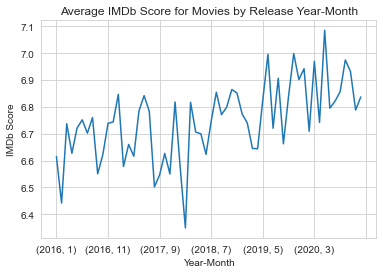

In [333]:

df_movies = df[df["Series or Movie"] == "Movie"]  # filter dataframe to include only movies

# group by year and month
df_movies_grouped = df_movies.groupby([df_movies["Netflix Release Date"].dt.year, df_movies["Netflix Release Date"].dt.month])["IMDb Score"].mean()

# plot the average IMDb score by year and month
df_movies_grouped.plot()
plt.xlabel('Year-Month')
plt.ylabel('IMDb Score')
plt.title('Average IMDb Score for Movies by Release Year-Month')
plt.show()

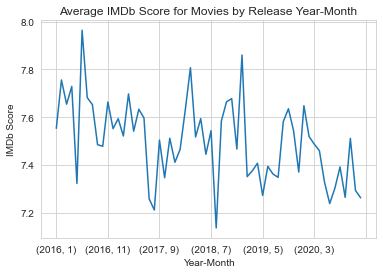

In [334]:

df_movies = df[df["Series or Movie"] == "Series"]  # filter dataframe to include only movies

# group by year and month
df_movies_grouped = df_movies.groupby([df_movies["Netflix Release Date"].dt.year, df_movies["Netflix Release Date"].dt.month])["IMDb Score"].mean()

# plot the average IMDb score by year and month
df_movies_grouped.plot()
plt.xlabel('Year-Month')
plt.ylabel('IMDb Score')
plt.title('Average IMDb Score for Movies by Release Year-Month')
plt.show()

##### Handle any invalid date values and convert them to NaT (Not a Time).

In [338]:
df["Release Date"] = pd.to_datetime(df["Release Date"], errors='coerce')
print(df["Release Date"].isna().sum())

155


##### The format is specified as 'Year-Month-Day'

In [340]:
pd.to_datetime(df["Release Date"], format='%Y-%m-%d').head(50)

269   2015-09-24
270   2011-03-05
271   2021-02-26
272   2020-02-28
273   2020-11-06
274   2020-05-08
275   2013-04-30
276   2003-08-29
277   2005-12-16
278   2005-12-02
279   1988-10-03
280   2005-12-17
281   1934-05-08
282   2020-08-06
283   2018-08-30
284   2016-06-01
285   2019-04-19
286   2010-05-06
287   2013-11-17
288   2017-11-09
289   1951-12-21
290   1990-06-14
291   2012-05-12
292   2005-07-02
293   2018-09-14
294   2006-12-21
295   2000-08-18
296   2020-03-25
297   2019-04-12
298   1966-09-12
299   2003-09-26
300   2001-05-24
301   2018-09-15
302   2020-03-18
303   2020-12-27
304   2020-01-10
305   2019-07-26
306   2019-09-06
307   2020-01-24
308   2020-05-05
309   2020-01-10
310   2019-06-27
311   2004-04-19
312   2018-11-09
313   2000-12-01
314   2019-09-27
315   2016-10-21
316   2019-10-04
317   2020-04-12
318   2013-03-03
Name: Release Date, dtype: datetime64[ns]

##### Create a line plot of the number of movies and series releases by year

<Figure size 720x360 with 0 Axes>

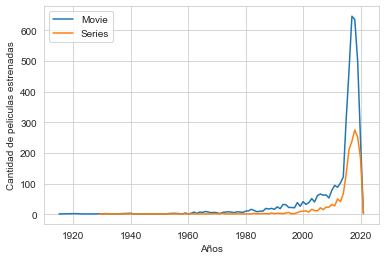

In [341]:
# Group the data by month and movie/series type
df_grouped = df.groupby([df["Release Date"].dt.year, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Años')
plt.ylabel('Cantidad de peliculas estrenadas')
fig.set_facecolor("white")
plt.show()

##### Create an histogram of the number of movies and series releases by year

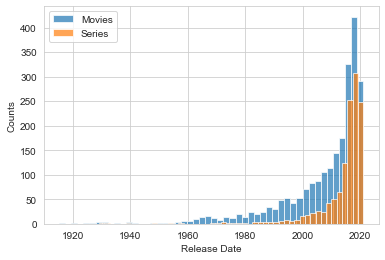

In [342]:

# Group the data by "Release Date" and "Series or Movie"
fig=plt.figure()
df_grouped = df.groupby(["Release Date", "Series or Movie"]).size().reset_index(name='counts')

# Create the histogram for Movies
plt.hist(df_grouped[df_grouped["Series or Movie"] == "Movie"]["Release Date"], bins=50, alpha=0.7, label='Movies')

# Create the histogram for Series
plt.hist(df_grouped[df_grouped["Series or Movie"] == "Series"]["Release Date"], bins=50, alpha=0.7, label='Series')

# Add the labels and legend
plt.xlabel("Release Date")

plt.ylabel("Counts")
plt.legend()
fig.set_facecolor("white")
plt.show()

##### Create a histogram that shows the number of movies and series releases over time, starting from 1960.

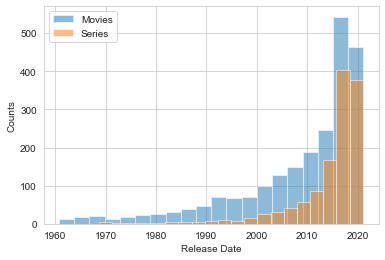

In [343]:
import datetime
fig=plt.figure()

# Create a boolean mask to select only the dates after 01/01/1960
mask = df_grouped["Release Date"].dt.date >= datetime.date(1960, 1, 1)

# Use the boolean mask to select only the rows with dates after 01/01/1960
df_1960 = df_grouped[mask]

# Create the histogram for Movies
plt.hist(df_1960[df_1960["Series or Movie"] == "Movie"]["Release Date"], bins=20, alpha=0.5, label='Movies')

# Create the histogram for Series
plt.hist(df_1960[df_1960["Series or Movie"] == "Series"]["Release Date"], bins=20, alpha=0.5, label='Series')

# Add the labels and legend
plt.xlabel("Release Date")
plt.ylabel("Counts")
plt.legend()
fig.set_facecolor("white")
plt.show()